In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')
sns.set(font_scale=2)

%matplotlib inline

In [2]:
df_train = pd.read_csv('./sample_data/train.csv')
df_test = pd.read_csv('./sample_data/test.csv')

In [3]:
df_train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_test.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Survival | 생존여부 | 1,0으로 표현 | integer

Pclass   | 티켓의 클래스 | 1 = 1st, 2 = 2nd, 3 = 3rd | integer

Sex      | 성별     | male, female | string

Age      | 나이     | continuous   | integer

sibSp    | 함께 탑승한 형제와 배우자의 수 | quantitative | integer

parch    | 함께 탑승한 부모, 아이의 수 | quantitative | integer

ticket   | 티켓 번호 | alphabet + integer | string

fare     | 탑승료    | continuous  | float

cabin    | 객실 번호 | alphabet + integer | string

embared  | 탑승 항구 | C = Cherbourg, Q = Queenstown, S = Southampton | string


In [5]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#2. 데이터 분석

2-1. Null data check

In [6]:
for col in df_train.columns:
    msg = 'column : {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (df_train[col].isnull().sum() / df_train[col].shape[0]))
    print(msg)

column : PassengerId	 Percent of NaN value: 0.00%
column :   Survived	 Percent of NaN value: 0.00%
column :     Pclass	 Percent of NaN value: 0.00%
column :       Name	 Percent of NaN value: 0.00%
column :        Sex	 Percent of NaN value: 0.00%
column :        Age	 Percent of NaN value: 19.87%
column :      SibSp	 Percent of NaN value: 0.00%
column :      Parch	 Percent of NaN value: 0.00%
column :     Ticket	 Percent of NaN value: 0.00%
column :       Fare	 Percent of NaN value: 0.00%
column :      Cabin	 Percent of NaN value: 77.10%
column :   Embarked	 Percent of NaN value: 0.22%


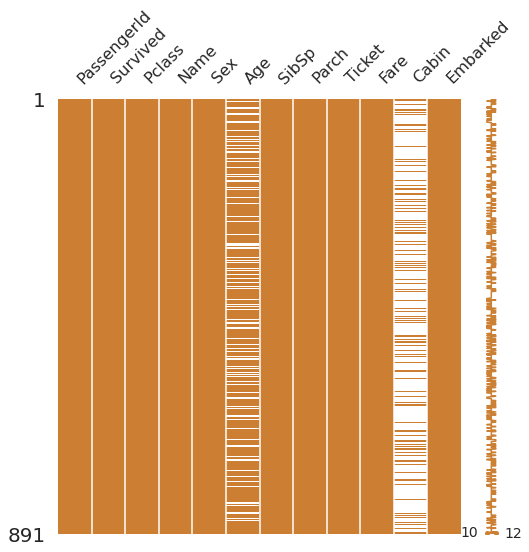

In [7]:
import missingno as msno
msno.matrix(df=df_train.iloc[:,:], figsize=(8,8), color=(0.8,0.5,0.2))

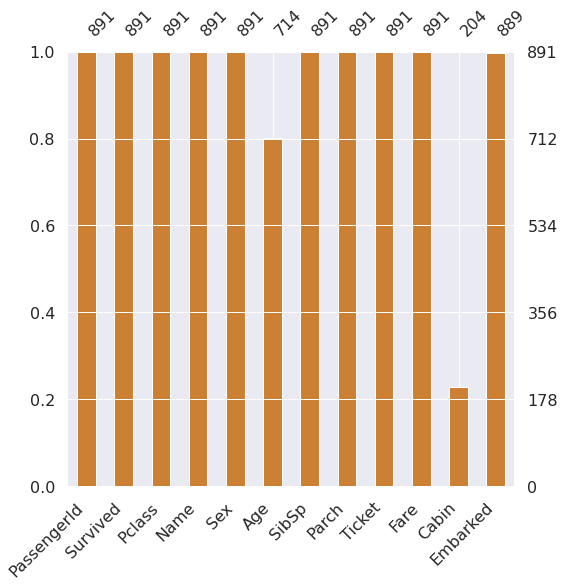

In [8]:
msno.bar(df=df_train.iloc[:,:], figsize=(8,8), color=(0.8,0.5,0.2))

2-2 Target label 확인

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Count plot')

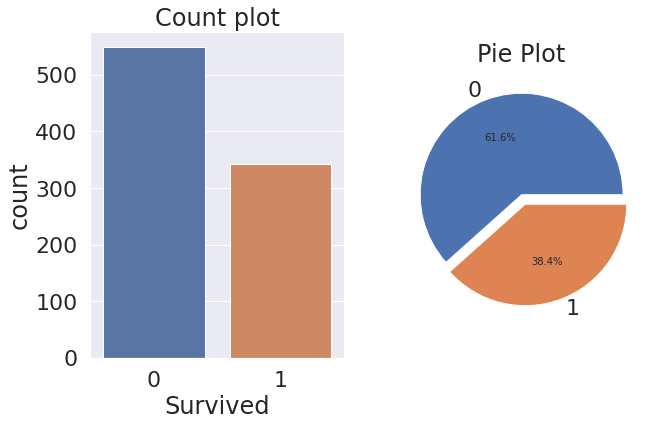

In [9]:
f, ax = plt.subplots(1,2, figsize=(10,6))

df_train['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%')
ax[1].set_title("Pie Plot")
ax[1].set_ylabel('')
sns.countplot('Survived', data=df_train, ax=ax[0])
ax[0].set_title('Count plot')

In [10]:
df_train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

#3. Exploartory data analysis (EDA)

### 3-1 Pclass 데이터 탐구
좌석의 등급, 좌석의 등급별로 생존율 차이가 날까?

In [11]:
df_train[['Pclass','Survived']].groupby(['Pclass']).count() #각 클스별 사람 수

,Survived
Pclass,
1,216
2,184
3,491


In [12]:
df_train[['Pclass','Survived']].groupby(['Pclass']).sum()

,Survived
Pclass,
1,136
2,87
3,119


In [13]:
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins=True).style.background_gradient()

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


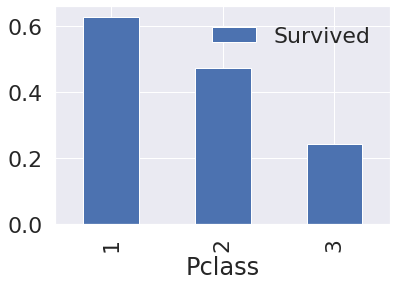

In [14]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


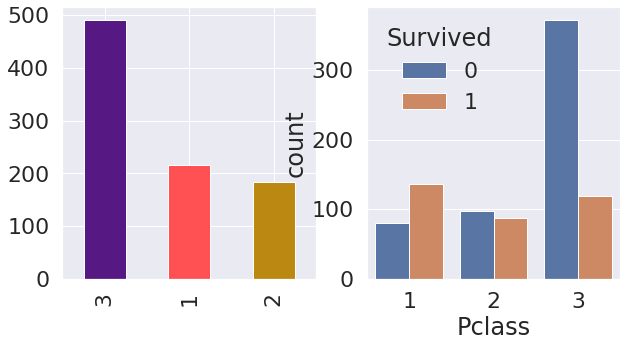

In [15]:
y_position = 1.02
f, ax = plt.subplots(1,2, figsize=(10,5))
df_train['Pclass'].value_counts().plot.bar(ax=ax[0], color=['#561984', '#FF5154', '#bb8811'])
sns.countplot('Pclass', hue='Survived', data=df_train, ax=ax[1])
plt.show()

### 3-2 성별
성별에 따른 생존율 차이

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


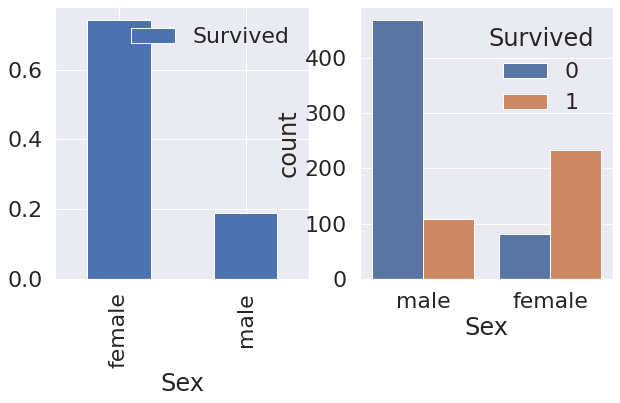

In [16]:
f, ax = plt.subplots(1,2, figsize=(10,5))
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean().plot.bar(ax=ax[0])
sns.countplot('Sex',hue='Survived', data=df_train, ax=ax[1])

In [17]:
pd.crosstab(df_train['Sex'], df_train['Survived'], margins=True).style.background_gradient()

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


###3-3 성별,Pclass를 동시에 고려한 생존률

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


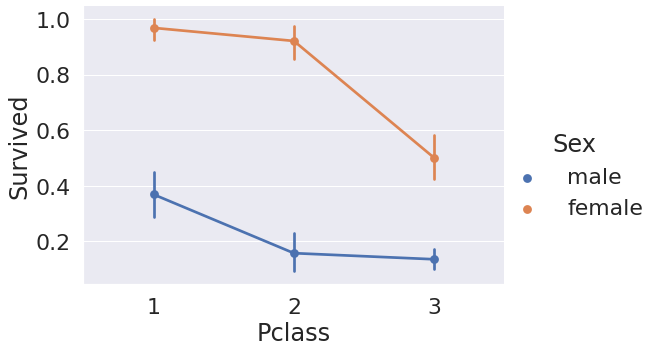

In [18]:
sns.factorplot('Pclass', 'Survived', hue='Sex', data=df_train, size=5, aspect=1.5)

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


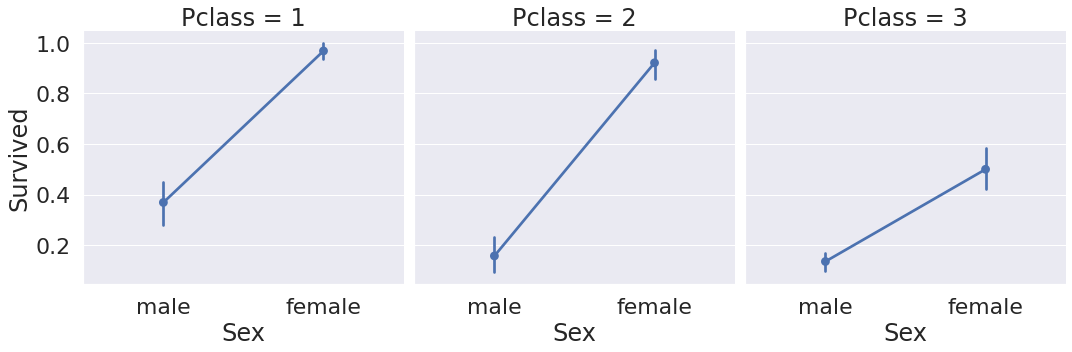

In [19]:
sns.factorplot(x='Sex', y='Survived', col='Pclass', data=df_train)

### 3-4 Age
나이에 대한 생존률

In [20]:
print("제일 나이가 많은 탑승객 : ", df_train['Age'].max())
print("제일 나이가 적은 탑승객 : ", df_train['Age'].min())
print("나이가 평균 탑승객 : ", df_train['Age'].mean())

제일 나이가 많은 탑승객 :  80.0
제일 나이가 적은 탑승객 :  0.42
나이가 평균 탑승객 :  29.69911764705882


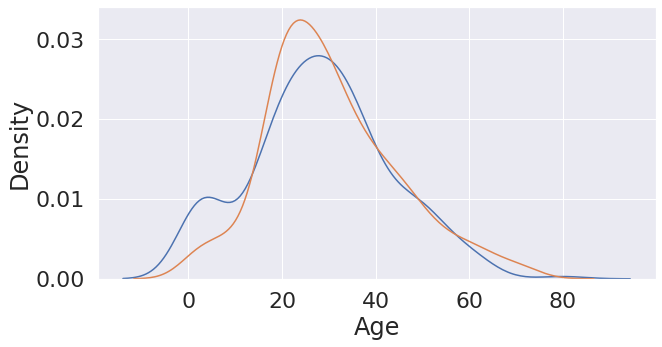

In [21]:
fig, ax = plt.subplots(1,1, figsize=(10,5))
sns.kdeplot(df_train[df_train['Survived'] == 1]['Age'], ax=ax)
sns.kdeplot(df_train[df_train['Survived'] == 0]['Age'], ax=ax)

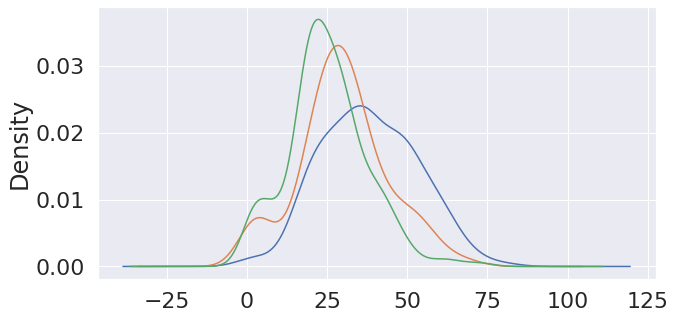

In [22]:
plt.figure(figsize=(10,5))
df_train['Age'][df_train['Pclass']==1].plot(kind='kde')
df_train['Age'][df_train['Pclass']==2].plot(kind='kde')
df_train['Age'][df_train['Pclass']==3].plot(kind='kde')

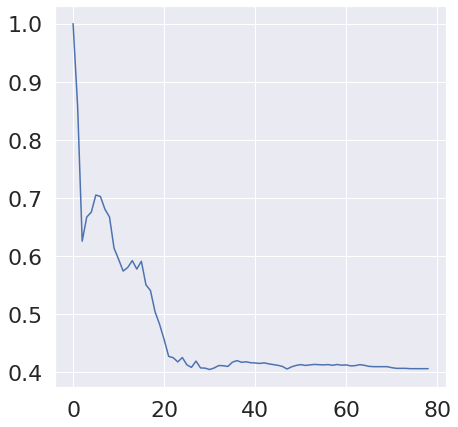

In [23]:
cummuate_survival_ratio = []
for i in range(1,80):
    cummuate_survival_ratio.append(df_train[df_train['Age'] < i]['Survived'].sum() / len(df_train[df_train['Age'] < i]['Survived']))

plt.figure(figsize=(7,7))
plt.plot(cummuate_survival_ratio)

In [24]:
cummuate_survival_ratio

[1.0,
 0.8571428571428571,
 0.625,
 0.6666666666666666,
 0.675,
 0.7045454545454546,
 0.7021276595744681,
 0.68,
 0.6666666666666666,
 0.6129032258064516,
 0.59375,
 0.5735294117647058,
 0.5797101449275363,
 0.5915492957746479,
 0.5769230769230769,
 0.5903614457831325,
 0.55,
 0.5398230088495575,
 0.5035971223021583,
 0.4817073170731707,
 0.45555555555555555,
 0.4264705882352941,
 0.42424242424242425,
 0.41700404858299595,
 0.4244604316546763,
 0.4119601328903654,
 0.40752351097178685,
 0.41839762611275966,
 0.4065934065934066,
 0.40625,
 0.40389294403892945,
 0.40654205607476634,
 0.4107142857142857,
 0.4103671706263499,
 0.4091858037578288,
 0.4164989939637827,
 0.41923076923076924,
 0.41634980988593157,
 0.4171322160148976,
 0.41560798548094374,
 0.41519434628975266,
 0.4143356643356643,
 0.4153846153846154,
 0.4135593220338983,
 0.41235392320534225,
 0.4110929853181077,
 0.4090909090909091,
 0.4048,
 0.4085173501577287,
 0.4109375,
 0.4123076923076923,
 0.410958904109589,
 0.411764

### 3-5 Pclass, Sex, Age 동시 고려

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


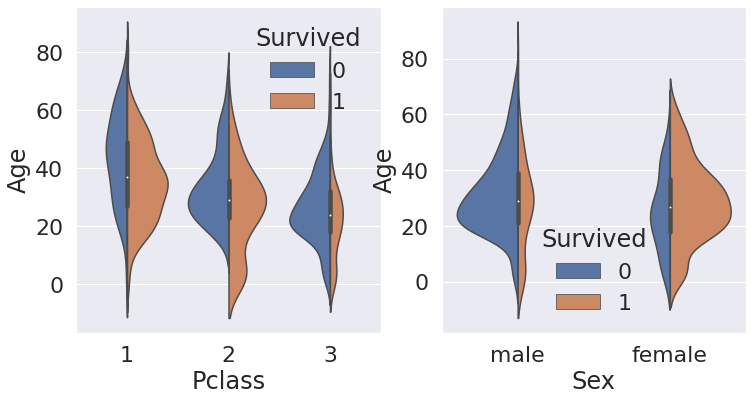

In [25]:
f, ax = plt.subplots(1,2,figsize=(12,6))
sns.violinplot("Pclass", "Age", hue="Survived", data=df_train, split=True,ax=ax[0], scale='count')
sns.violinplot("Sex", 'Age', hue="Survived", data=df_train, split=True, ax=ax[1], scale='count')

In [26]:
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1 # 자신을 포함해야하니 1을 더합니다
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] + 1 # 자신을 포함해야하니 1을 더합니다

In [27]:
print("Maximum size of Family: ", df_train['FamilySize'].max())
print("Minimum size of Family: ", df_train['FamilySize'].min())

Maximum size of Family:  11
Minimum size of Family:  1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


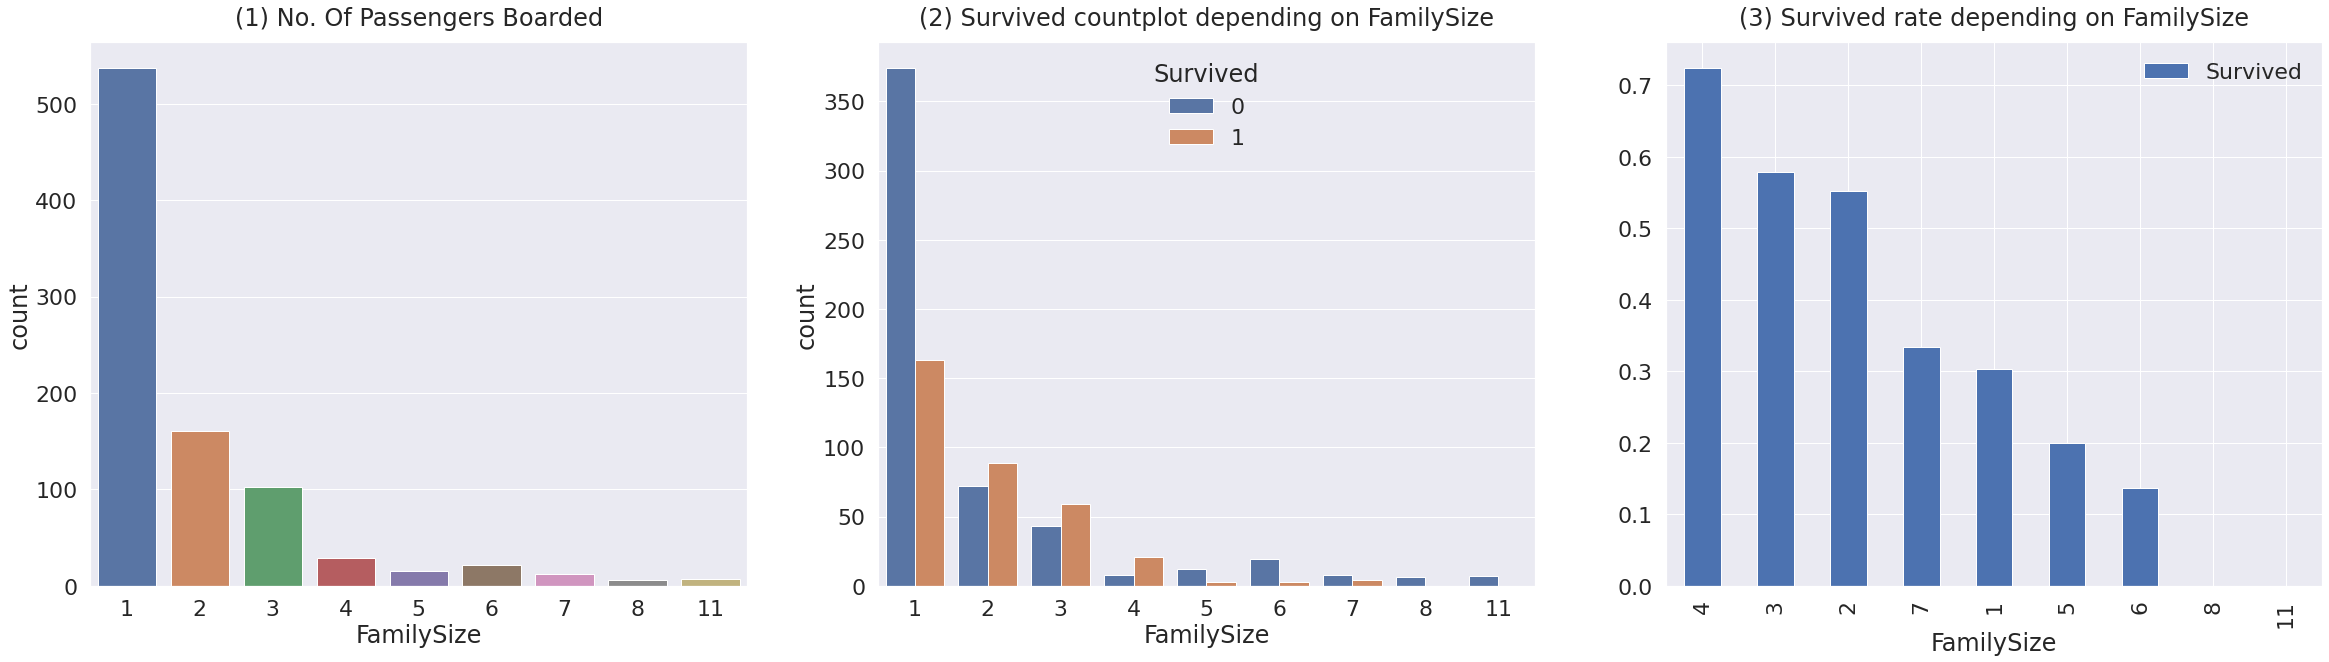

In [28]:
f,ax=plt.subplots(1, 3, figsize=(40,10))
sns.countplot('FamilySize', data=df_train, ax=ax[0])
ax[0].set_title('(1) No. Of Passengers Boarded', y=1.02)

sns.countplot('FamilySize', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('(2) Survived countplot depending on FamilySize',  y=1.02)

df_train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax[2])
ax[2].set_title('(3) Survived rate depending on FamilySize',  y=1.02)

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


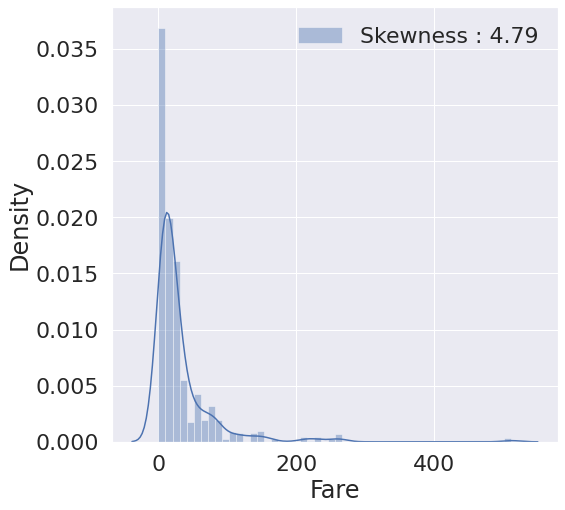

In [29]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
g = sns.distplot(df_train['Fare'], color='b', label='Skewness : {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

In [30]:
df_test.loc[df_test.Fare.isnull(), 'Fare'] = df_test['Fare'].mean() # testset 에 있는 nan value 를 평균값으로 치환합니다.

df_train['Fare'] = df_train['Fare'].map(lambda i: np.log(i) if i > 0 else 0)
df_test['Fare'] = df_test['Fare'].map(lambda i: np.log(i) if i > 0 else 0)

In [31]:
df_train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,1.981001,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.266662,C85,C,2


#4. Feature Engineering

### 4-1 Fill Null

In [32]:
df_train['Initial'] = df_train.Name.str.extract('([A-Za-z]+)\.')
df_test['Initial'] = df_train.Name.str.extract('([A-Za-z]+)\.')

In [33]:
df_test.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Initial
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,2.057860,NaN,Q,1,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,1.945910,NaN,S,2,Mrs
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,2.270836,NaN,Q,1,Miss


In [34]:
df_train['Initial'].value_counts()
pd.crosstab(df_train['Initial'], df_train['Sex']).style.background_gradient()

Sex,female,male
Initial,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [35]:
df_train['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don','Dona'],
                            ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr','Mr'],inplace=True)
df_test['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don','Dona'],
                            ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr','Mr'],inplace=True)

In [36]:
df_train['Initial'].value_counts()

Mr        529
Miss      186
Mrs       127
Master     40
Other       9
Name: Initial, dtype: int64

In [37]:
df_train.groupby('Initial').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
Initial,,,,,,,,
Master,414.975000,0.575000,2.625000,4.574167,2.300000,1.375000,3.340710,4.675000
Miss,411.741935,0.704301,2.284946,21.860000,0.698925,0.537634,3.123713,2.236559
Mr,455.880907,0.162571,2.381853,32.739609,0.293006,0.151229,2.651507,1.444234
Mrs,456.393701,0.795276,1.984252,35.981818,0.692913,0.818898,3.443751,2.511811
Other,564.444444,0.111111,1.666667,45.888889,0.111111,0.111111,2.641605,1.222222


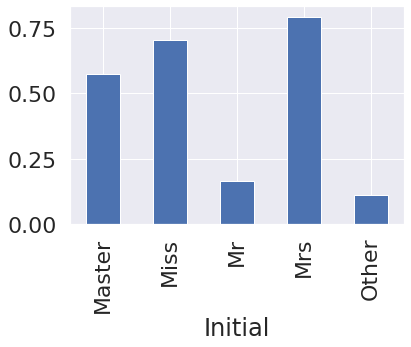

In [38]:
df_train.groupby('Initial')['Survived'].mean().plot(kind='bar')

In [39]:
df_train['Age'].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888     True
889    False
890    False
Name: Age, Length: 891, dtype: bool

In [40]:
df_train.loc[(df_train.Age.isnull()) & (df_train.Initial == 'Mr'), 'Age'] = 33
df_train.loc[(df_train.Age.isnull()) & (df_train.Initial == 'Mrs'), 'Age'] = 36
df_train.loc[(df_train.Age.isnull()) & (df_train.Initial == 'Master'), 'Age'] = 5
df_train.loc[(df_train.Age.isnull()) & (df_train.Initial == 'Miss'), 'Age'] = 22
df_train.loc[(df_train.Age.isnull()) & (df_train.Initial == 'Other'), 'Age'] = 46

df_test.loc[(df_test.Age.isnull()) & (df_test.Initial == 'Mr'), 'Age'] = 33
df_test.loc[(df_test.Age.isnull()) & (df_test.Initial == 'Mrs'), 'Age'] = 36
df_test.loc[(df_test.Age.isnull()) & (df_test.Initial == 'Master'), 'Age'] = 5
df_test.loc[(df_test.Age.isnull()) & (df_test.Initial == 'Miss'), 'Age'] = 22
df_test.loc[(df_test.Age.isnull()) & (df_test.Initial == 'Other'), 'Age'] = 46

In [41]:
df_train['Age_cat'] = 0
df_train.loc[df_train['Age'] < 10, 'Age_cat'] = 0
df_train.loc[(10 <= df_train['Age']) & (df_train['Age']< 20) , 'Age_cat'] = 1
df_train.loc[(20 <= df_train['Age']) & (df_train['Age']< 30) , 'Age_cat'] = 2
df_train.loc[(30 <= df_train['Age']) & (df_train['Age']< 40) , 'Age_cat'] = 3
df_train.loc[(40 <= df_train['Age']) & (df_train['Age']< 50) , 'Age_cat'] = 4
df_train.loc[(50 <= df_train['Age']) & (df_train['Age']< 60) , 'Age_cat'] = 5
df_train.loc[(60 <= df_train['Age']) & (df_train['Age']< 70) , 'Age_cat'] = 6
df_train.loc[70 <= df_train['Age'], 'Age_cat'] = 7

df_test['Age_cat'] = 0
df_test.loc[df_test['Age'] < 10, 'Age_cat'] = 0
df_test.loc[(10 <= df_test['Age']) & (df_test['Age']< 20) , 'Age_cat'] = 1
df_test.loc[(20 <= df_test['Age']) & (df_test['Age']< 30) , 'Age_cat'] = 2
df_test.loc[(30 <= df_test['Age']) & (df_test['Age']< 40) , 'Age_cat'] = 3
df_test.loc[(40 <= df_test['Age']) & (df_test['Age']< 50) , 'Age_cat'] = 4
df_test.loc[(50 <= df_test['Age']) & (df_test['Age']< 60) , 'Age_cat'] = 5
df_test.loc[(60 <= df_test['Age']) & (df_test['Age']< 70) , 'Age_cat'] = 6
df_test.loc[70 <= df_test['Age'], 'Age_cat'] = 7

In [42]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Initial,Age_cat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,1.981001,NaN,S,2,Mr,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.266662,C85,C,2,Mrs,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.070022,NaN,S,1,Miss,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.972177,C123,S,2,Mrs,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.085672,NaN,S,1,Mr,3


In [43]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Initial,Age_cat
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,2.057860,NaN,Q,1,Mr,3
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,1.945910,NaN,S,2,Mrs,4
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,2.270836,NaN,Q,1,Miss,6
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,2.159003,NaN,S,1,Mrs,2
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,2.508582,NaN,S,3,Mr,2


In [44]:
print('Embarked has ', sum(df_train['Embarked'].isnull()), ' Null values')

Embarked has  2  Null values


In [45]:
df_train['Embarked'].fillna('S', inplace=True)

In [46]:
def category_age(x):
    if x < 10:
        return 0
    elif x < 20:
        return 1
    elif x < 30:
        return 2
    elif x < 40:
        return 3
    elif x < 50:
        return 4
    elif x < 60:
        return 5
    elif x < 70:
        return 6
    else: 
        return 7

df_train['Age_cat_2'] = df_train['Age'].apply(category_age)


In [47]:
df_train.drop(['Age', 'Age_cat_2'], axis=1, inplace=True)
df_test.drop(['Age'], axis=1, inplace=True)

In [48]:
df_train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Initial,Age_cat
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,1.981001,NaN,S,2,Mr,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,4.266662,C85,C,2,Mrs,3


In [49]:
df_train['Sex'] = df_train['Sex'].map({'female':0, 'male':1})
df_test['Sex'] = df_test['Sex'].map({'female':0,'male':1})

In [50]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Initial,Age_cat
0,1,0,3,"Braund, Mr. Owen Harris",1,1,0,A/5 21171,1.981001,NaN,S,2,Mr,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,0,PC 17599,4.266662,C85,C,2,Mrs,3
2,3,1,3,"Heikkinen, Miss. Laina",0,0,0,STON/O2. 3101282,2.070022,NaN,S,1,Miss,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,0,113803,3.972177,C123,S,2,Mrs,3
4,5,0,3,"Allen, Mr. William Henry",1,0,0,373450,2.085672,NaN,S,1,Mr,3


In [51]:
df_train['Initial'] = df_train['Initial'].map({'Master':0, 'Miss':1, 'Mr':2, 'Mrs':3, 'Other':4})
df_test['Initial'] = df_test['Initial'].map({'Master':0, 'Miss':1, 'Mr':2, 'Mrs':3, 'Other':4})

In [52]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Initial,Age_cat
0,1,0,3,"Braund, Mr. Owen Harris",1,1,0,A/5 21171,1.981001,NaN,S,2,2,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,0,PC 17599,4.266662,C85,C,2,3,3
2,3,1,3,"Heikkinen, Miss. Laina",0,0,0,STON/O2. 3101282,2.070022,NaN,S,1,1,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,0,113803,3.972177,C123,S,2,3,3
4,5,0,3,"Allen, Mr. William Henry",1,0,0,373450,2.085672,NaN,S,1,2,3


In [53]:
df_train['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [54]:
df_train['Embarked'] = df_train['Embarked'].map({'C':0, 'Q':1, 'S':2})
df_test['Embarked'] = df_test['Embarked'].map({'C':0, 'Q':1, 'S':2})

In [55]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Initial,Age_cat
0,1,0,3,"Braund, Mr. Owen Harris",1,1,0,A/5 21171,1.981001,NaN,2,2,2,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,0,PC 17599,4.266662,C85,0,2,3,3
2,3,1,3,"Heikkinen, Miss. Laina",0,0,0,STON/O2. 3101282,2.070022,NaN,2,1,1,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,0,113803,3.972177,C123,2,2,3,3
4,5,0,3,"Allen, Mr. William Henry",1,0,0,373450,2.085672,NaN,2,1,2,3


In [56]:
df_train['Embarked'].isnull().any()

False

In [57]:
heatmap_data = df_train[['Survived', 'Pclass', 'Sex', 'Fare', 'Embarked', 'FamilySize', 'Initial', 'Age_cat']]

In [58]:
colormap = plt.cm.RdBu

In [59]:
heatmap_data.corr()

,Survived,Pclass,Sex,Fare,Embarked,FamilySize,Initial,Age_cat
Survived,1.000000,-0.338481,-0.543351,0.331805,-0.167675,0.016639,-0.085529,-0.095002
Pclass,-0.338481,1.000000,0.131900,-0.670489,0.162098,0.065997,-0.133054,-0.314809
Sex,-0.543351,0.131900,1.000000,-0.264751,0.108262,-0.200988,0.051687,0.122917
Fare,0.331805,-0.670489,-0.264751,1.000000,-0.199932,0.389193,-0.019889,0.077791
Embarked,-0.167675,0.162098,0.108262,-0.199932,1.000000,0.066516,0.026550,-0.033173
FamilySize,0.016639,0.065997,-0.200988,0.389193,0.066516,1.000000,-0.204574,-0.280537
Initial,-0.085529,-0.133054,0.051687,-0.019889,0.026550,-0.204574,1.000000,0.481309
Age_cat,-0.095002,-0.314809,0.122917,0.077791,-0.033173,-0.280537,0.481309,1.000000


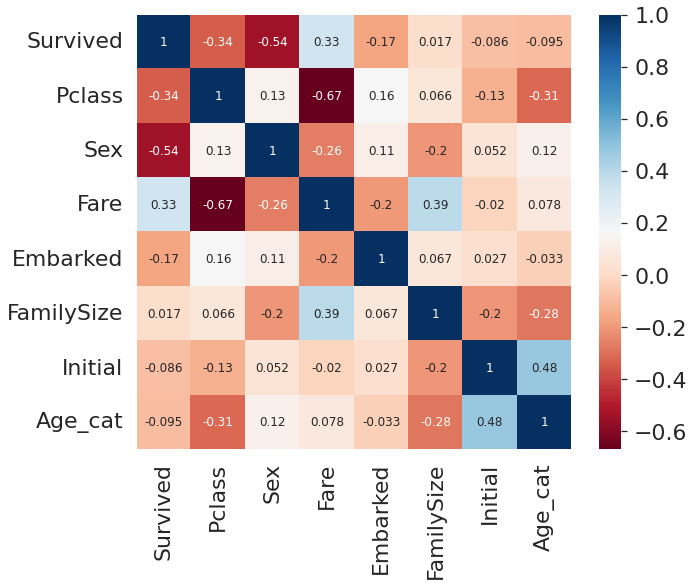

In [60]:
plt.figure(figsize=(10,8))
sns.heatmap(heatmap_data.astype(float).corr(), annot=True, annot_kws={"size" : 12}, square=True, cmap=colormap)

In [61]:
df_train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Initial,Age_cat
0,1,0,3,"Braund, Mr. Owen Harris",1,1,0,A/5 21171,1.981001,NaN,2,2,2,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,0,PC 17599,4.266662,C85,0,2,3,3


In [62]:
df_train = pd.get_dummies(df_train, columns=['Initial'], prefix='Initial')


In [63]:
df_test = pd.get_dummies(df_test, columns=['Initial'], prefix='Initial')

In [64]:
df_test.head(2)

,PassengerId,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4
0,892,3,"Kelly, Mr. James",1,0,0,330911,2.05786,NaN,1,1,3,0,0,1,0,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,1,0,363272,1.94591,NaN,2,2,4,0,0,0,1,0


In [65]:
df_train = pd.get_dummies(df_train, columns=['Embarked'], prefix='Embarked')
df_test = pd.get_dummies(df_test, columns=['Embarked'], prefix='Embarked')

In [66]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_0,Embarked_1,Embarked_2
0,1,0,3,"Braund, Mr. Owen Harris",1,1,0,A/5 21171,1.981001,NaN,2,2,0,0,1,0,0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,0,PC 17599,4.266662,C85,2,3,0,0,0,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,0,0,STON/O2. 3101282,2.070022,NaN,1,2,0,1,0,0,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,0,113803,3.972177,C123,2,3,0,0,0,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",1,0,0,373450,2.085672,NaN,1,3,0,0,1,0,0,0,0,1


In [67]:
df_train.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin'], axis=1, inplace=True)
df_test.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin'], axis=1, inplace=True)

In [68]:
df_train.head(2)

,Survived,Pclass,Sex,Fare,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_0,Embarked_1,Embarked_2
0,0,3,1,1.981001,2,2,0,0,1,0,0,0,0,1
1,1,1,0,4.266662,2,3,0,0,0,1,0,1,0,0


#5. Classification

In [69]:
x_train_tmp = df_train[['Pclass', 'Sex', 'Fare', 'FamilySize', 'Age_cat']]
y_train_tmp = df_train[['Survived']]

In [70]:
x_train_tmp.shape[1]

5

In [71]:
num_feature = x_train_tmp.shape[1]
W = np.ones([num_feature,1])
b = np.ones([1,1])

x_train = x_train_tmp.values
y_train = y_train_tmp.values

In [72]:
x_train

array([[3.        , 1.        , 1.98100147, 2.        , 2.        ],
       [1.        , 0.        , 4.26666208, 2.        , 3.        ],
       [3.        , 0.        , 2.07002232, 1.        , 2.        ],
       ...,
       [3.        , 0.        , 3.15487049, 4.        , 2.        ],
       [1.        , 1.        , 3.40119738, 1.        , 2.        ],
       [3.        , 1.        , 2.04769284, 1.        , 3.        ]])

In [73]:
def f(X, W, b):
  return np.matmul(X, W) + b

def sigmoid(X):
  return 1 / (1+ np.exp(-X))


def loss_function(y_pred, Y):
  return 1/y_pred.shape[0] * np.sum(-Y * np.log(y_pred) - (1-Y)*np.log(1-y_pred), axis=0)

def gradient(y_pred, Y, X):
  #dw = (1/y_pred.shape[0]) * np.matmul(X.transpose(), (y_pred-Y))
  dw = (1/y_pred.shape[0]) * np.sum((y_pred-Y)*X, axis=0, keepdims=True).transpose()
  db = (1/y_pred.shape[0]) * np.sum(y_pred - Y, axis=0, keepdims=True)

  return dw, db

def gradient_descent(W, b, learning_rate, dw, db):
  W = W -learning_rate*dw
  b = b -learning_rate*db

  return W, b


def accuracy(y_pred, y_true):
  np_a = np.array(y_pred)
  np_b = np.array(y_true)
  np_a_around = np.around(np_a)
  np_b_around = np.around(np_b)
  y = np_a_around.reshape(np_a_around.shape[0])
  y_pred = np_b_around.reshape(np_b_around.shape[0])
  
  return sum(y==y_pred)/len(y)

x (891, 5)
W (5, 1)
예측 정확도: 0.3838383838383838
예측 정확도: 0.3838383838383838
예측 정확도: 0.3838383838383838
예측 정확도: 0.3838383838383838
예측 정확도: 0.3838383838383838
예측 정확도: 0.3838383838383838
예측 정확도: 0.3838383838383838
예측 정확도: 0.3838383838383838
예측 정확도: 0.3838383838383838
예측 정확도: 0.3838383838383838
예측 정확도: 0.3838383838383838
예측 정확도: 0.3838383838383838
예측 정확도: 0.3838383838383838
예측 정확도: 0.3838383838383838
예측 정확도: 0.3838383838383838
예측 정확도: 0.3838383838383838
예측 정확도: 0.3838383838383838
예측 정확도: 0.3838383838383838
예측 정확도: 0.3838383838383838
예측 정확도: 0.3838383838383838
예측 정확도: 0.3838383838383838
예측 정확도: 0.3838383838383838
예측 정확도: 0.3838383838383838
예측 정확도: 0.3838383838383838
예측 정확도: 0.3838383838383838
예측 정확도: 0.3838383838383838
예측 정확도: 0.3838383838383838
예측 정확도: 0.3838383838383838
예측 정확도: 0.3838383838383838
예측 정확도: 0.3838383838383838
예측 정확도: 0.3838383838383838
예측 정확도: 0.3838383838383838
예측 정확도: 0.3838383838383838
예측 정확도: 0.3838383838383838
예측 정확도: 0.3838383838383838
예측 정확도: 0.3838383838383838
예측 정확도: 

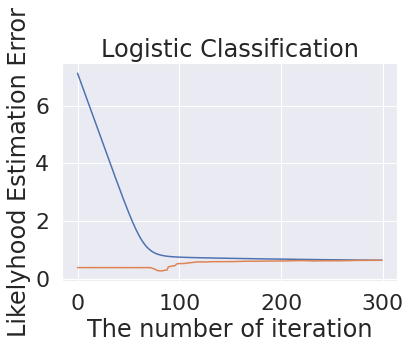

In [74]:
losses = []

accuracies = []
print("x", x_train.shape)
print("W", W.shape)

for idx in range(300):
    fx = f(x_train, W, b)
    y_pred = sigmoid(fx)
    loss = loss_function(y_pred, y_train)
    dw, db = gradient(y_pred, y_train, x_train)
    W, b = gradient_descent(W,b, 0.01, dw, db)

  #prediction = np.argmax(y_pred, axis=0)
  #print("나의 예측", y_pred)
  #print("실제 정답", y_train)

    acc = accuracy(y_pred, y_train)
    print("예측 정확도:", acc)

    losses.append(loss)
    accuracies.append(acc)


plt.plot(losses)
plt.ylabel('Likelyhood Estimation Error')
plt.xlabel('The number of iteration')
plt.title("Logistic Classification")

plt.plot(np.array(accuracies))
plt.ylabel('Likelyhood Estimation Error')
plt.xlabel('The number of iteration')
plt.title("Logistic Classification")
plt.show()

#5-2 Random Forest Classfication on sklearn

In [75]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [76]:
X_train = df_train.drop('Survived', axis=1).values
target_label = df_train['Survived'].values
X_test = df_test.values

In [78]:
X_tr, X_vld, y_tr, y_vld = train_test_split(X_train, target_label, test_size=0.3, random_state=2018)

In [84]:
y_vld

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1])

In [85]:
model = RandomForestClassifier()
model.fit(X_tr, y_tr)
prediction = model.predict(X_vld)

In [86]:
print(prediction)

[0 1 0 0 1 0 0 0 0 0 0 1 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0
 0 0 0 0 0 0 1 0 1 1 1 0 0 1 0 1 0 1 1 0 1 0 1 0 1 0 0 1 0 0 0 0 0 1 1 1 0
 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 1 1
 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 1 1 0 1 1 0 1 0 1 0 1 0 0
 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 1 0 1 0 1 1 1 1 0 0 0 0 0 1
 1 1 0 0 0 0 1 0 1 1 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 1 1 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1 0 0 0 0 0 0 1 0 1 1
 0 1 0 1 1 0 0 0 1]


In [88]:
print('총 {}명 중 {:.2f}% 정확도로 생존을 맞춤'.format(y_vld.shape[0], 100*metrics.accuracy_score(prediction, y_vld)))

총 268명 중 82.84% 정확도로 생존을 맞춤


#5.3 Feature importance

In [89]:
from pandas import Series

feature_importance = model.feature_importances_
Series_feat_imp = Series(feature_importance, index=df_test.columns)

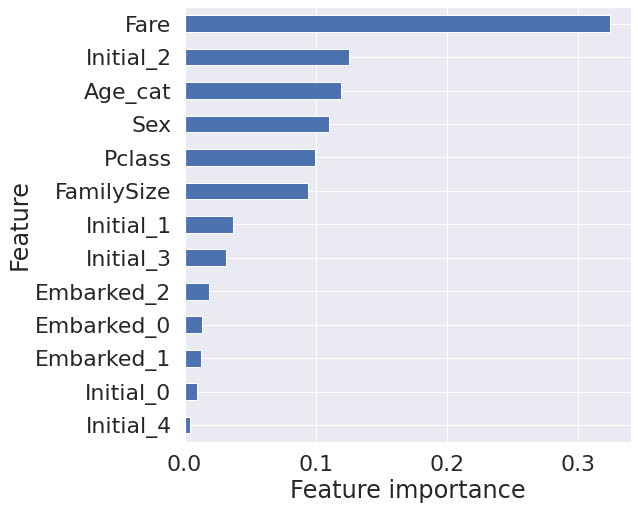

In [90]:
plt.figure(figsize=(8,8))
Series_feat_imp.sort_values(ascending=True).plot.barh()
plt.xlabel('Feature importance')
plt.ylabel('Feature')
plt.show()

#5.4 Prediction on Test set

In [91]:
X_test

array([[3.        , 1.        , 2.05786033, ..., 0.        , 1.        ,
        0.        ],
       [3.        , 0.        , 1.94591015, ..., 0.        , 0.        ,
        1.        ],
       [2.        , 1.        , 2.27083639, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [3.        , 1.        , 1.98100147, ..., 0.        , 0.        ,
        1.        ],
       [3.        , 1.        , 2.08567209, ..., 0.        , 0.        ,
        1.        ],
       [3.        , 1.        , 3.10719762, ..., 1.        , 0.        ,
        0.        ]])

In [92]:
submission = pd.read_csv('./sample_data/gender_submission.csv')

In [93]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [94]:
prediction = model.predict(X_test)
submission['Survived']=prediction

In [95]:
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,1
3,895,1
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [96]:
submission.to_csv('./my_first_submission.csv', index=False)